In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/markynsailamar/Dropbox/My Mac (Markynsai’s MacBook Pro)/Documents/UDEMY PROJECT/BANK DATA ANALYSIS/bank.csv',low_memory=False)

In [3]:
print("Preview of the data:")
print(data.head())

Preview of the data:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


# Get basic info

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [5]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


# Basic statistics (for numeric columns)

In [6]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.75

# Check number of duplicate rows

In [7]:
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


# Check column data types

In [8]:
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


# Remove any '.' at the end of job titles and strip spaces

In [9]:
data['job']=data['job'].str.replace('.','',regex=False).str.strip().str.lower()
data['marital'] = data['marital'].str.strip().str.lower()
data['education'] = data['education'].str.strip().str.lower()

# Automatically find all text/object columns

In [10]:
text_columns = data.select_dtypes(include='object').columns.tolist()

print("Text columns detected:", text_columns)

# Clean them all in one go
for col in text_columns:
    data[col] = (
        data[col]
        .astype(str)                 # ensure it's string for safety
        .str.lower()                 # make lowercase
        .str.strip()                 # remove leading/trailing spaces
        .str.replace('.', '', regex=False)  # remove periods
        .replace('unknown', pd.NA)   # convert 'unknown' to NaN
    )

Text columns detected: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


# Quick check of first few cleaned columns

In [11]:
for col in text_columns[:5]:  # show first 5 columns for preview
    print(f"\nUnique values in {col}:")
    print(data[col].unique()[:10])  # show up to 10 unique va


Unique values in job:
['admin' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' <NA>]

Unique values in marital:
['married' 'single' 'divorced']

Unique values in education:
['secondary' 'tertiary' 'primary' <NA>]

Unique values in default:
['no' 'yes']

Unique values in housing:
['yes' 'no']


In [12]:
#Convert yes/no columns → 1/0
df=data.copy()

In [13]:
# Map yes/no columns to 1/0 (use only columns that exist in your file)
yn_cols = [c for c in ['deposit','housing','loan','default'] if c in df.columns]
for c in yn_cols:
    df[c] = df[c].str.lower().map({'yes':1, 'no':0}).astype('Int64')

In [14]:
df[yn_cols].head(3)

,deposit,housing,loan,default
0,1,1,0,0
1,1,0,0,0
2,1,1,0,0


In [15]:
if 'pdays' in df.columns:
    df['not_previously_contacted'] = (df['pdays'] == -1).astype('Int64')
    # replace -1 with NA so stats treat it as missing time-since-contact
    df['pdays'] = df['pdays'].replace(-1, pd.NA).astype('Float64')

In [16]:
#Remove duplicates (if any)
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 0


In [17]:
print(df.dtypes)

age                           int64
job                          object
marital                      object
education                    object
default                       Int64
balance                       int64
housing                       Int64
loan                          Int64
contact                      object
day                           int64
month                        object
duration                      int64
campaign                      int64
pdays                       Float64
previous                      int64
poutcome                     object
deposit                       Int64
not_previously_contacted      Int64
dtype: object


In [18]:
print(df.head())

   age         job  marital  education  default  balance  housing  loan  \
0   59       admin  married  secondary        0     2343        1     0   
1   56       admin  married  secondary        0       45        0     0   
2   41  technician  married  secondary        0     1270        1     0   
3   55    services  married  secondary        0     2476        1     0   
4   54       admin  married   tertiary        0      184        0     0   

  contact  day month  duration  campaign  pdays  previous poutcome  deposit  \
0    <NA>    5   may      1042         1   <NA>         0     <NA>        1   
1    <NA>    5   may      1467         1   <NA>         0     <NA>        1   
2    <NA>    5   may      1389         1   <NA>         0     <NA>        1   
3    <NA>    5   may       579         1   <NA>         0     <NA>        1   
4    <NA>    5   may       673         2   <NA>         0     <NA>        1   

   not_previously_contacted  
0                         1  
1             

In [19]:
#Save an interim cleaned file
df.to_csv('/Users/markynsailamar/Dropbox/My Mac (Markynsai’s MacBook Pro)/Documents/UDEMY PROJECT/bank_step2_clean.csv', index=False)
print("Saved:", 'bank_step2_clean.csv')

Saved: bank_step2_clean.csv


<h1>
Q1) What’s the overall conversion rate?</h1>

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,not_previously_contacted
0,59,admin,married,secondary,0,2343,1,0,<NA>,5,may,1042,1,<NA>,0,<NA>,1,1
1,56,admin,married,secondary,0,45,0,0,<NA>,5,may,1467,1,<NA>,0,<NA>,1,1
2,41,technician,married,secondary,0,1270,1,0,<NA>,5,may,1389,1,<NA>,0,<NA>,1,1
3,55,services,married,secondary,0,2476,1,0,<NA>,5,may,579,1,<NA>,0,<NA>,1,1
4,54,admin,married,tertiary,0,184,0,0,<NA>,5,may,673,2,<NA>,0,<NA>,1,1


# ===============================================================
# STEP 4 — EXPLORATORY DATA ANALYSIS (EDA)
# ===============================================================

# ---------------------------------------------------------------
# Q1. OVERALL CONVERSION RATE
# Definition:
#   The conversion rate tells us what percentage of all customers
#   agreed to subscribe to a term deposit after the marketing call.
# Formula:
#   Conversion Rate = (Number of 'yes' / Total Customers) * 100
# ---------------------------------------------------------------

In [21]:
overall_coversion = df['deposit'].mean() * 100
print(f"Overall Conversion Rate = {overall_coversion:.2f}%")

Overall Conversion Rate = 47.38%


# Q2. CONVERSION RATE BY JOB
# ----------------------------------------------------------------
# Definition:
#   Shows which job types (e.g., management, technician, student)
#   have the highest success rates in the campaign.
#
# Formula:
#   Conversion Rate(job_i) =
#       (Number of 'yes' for job_i / Total customers with job_i) * 100
#
# Explanation:
#   We group the data by 'job' and find the mean of 'deposit' within each group.


In [22]:


conv_by_job = (
    df.groupby('job', dropna=False)['deposit']
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)
print("\nTop 5 Jobs by Conversion Rate (%) by job:")
print(conv_by_job.head(5))


Top 5 Jobs by Conversion Rate (%) by job:
job
student       74.72
retired       66.32
unemployed    56.58
management     50.7
NaN           48.57
Name: deposit, dtype: Float64


# ----------------------------------------------------------------
# Q3. CONVERSION RATE BY AGE GROUP
# ----------------------------------------------------------------
# Definition:
#   This tells us which age group is most likely to subscribe to a term deposit.
#
# Formula (for each age group g):
#   Conversion Rate(g) =
#       (Number of 'yes' in group_g / Total customers in group_g) * 100
#
# Explanation:
#   We divide ages into three categories (young, middle-aged, senior),
#   then calculate the mean of 'deposit' for each age range.


In [24]:
age_bins = [0, 30, 50, 120]
age_labels = ['18-30','31-50','51+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

conv_by_age = (
    df.groupby('age_group')['deposit']
      .mean()
      .mul(100)
      .round(2)
)
print("\nConversion Rate by Age Group (%):")
print(conv_by_age.sort_values(ascending=False))


Conversion Rate by Age Group (%):
age_group
18-30    59.83
51+      51.97
31-50    42.84
Name: deposit, dtype: Float64


/var/folders/8y/mk_jc67j25ggp8qd8w922dc40000gn/T/ipykernel_1228/1072420762.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['deposit']


# ----------------------------------------------------------------
# Optional: Visualize results to better understand trends
# ----------------------------------------------------------------


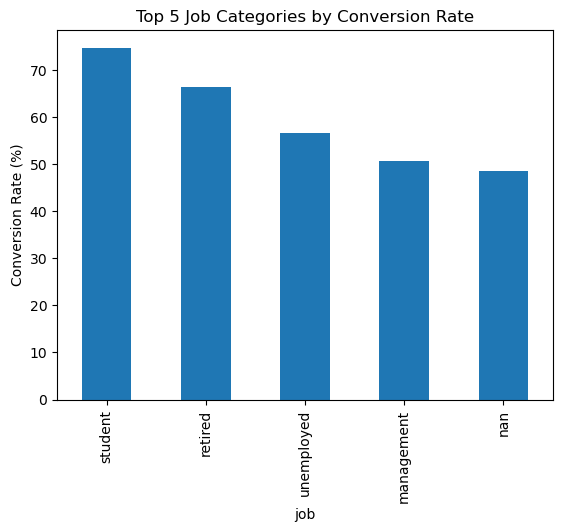

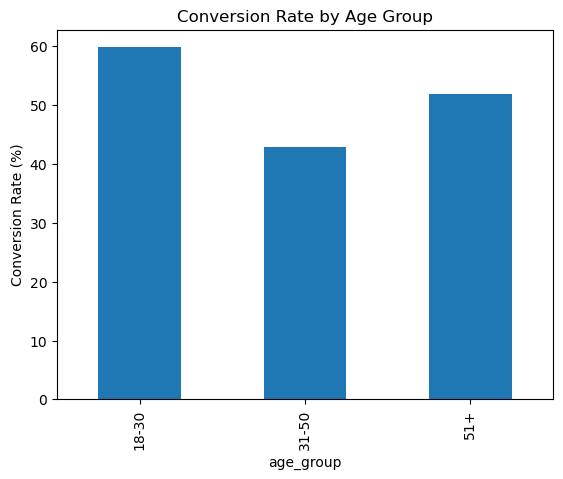

In [25]:
import matplotlib.pyplot as plt

conv_by_job.head(5).plot(kind='bar')
plt.title("Top 5 Job Categories by Conversion Rate")
plt.ylabel("Conversion Rate (%)")
plt.show()

conv_by_age.plot(kind='bar')
plt.title("Conversion Rate by Age Group")
plt.ylabel("Conversion Rate (%)")
plt.show()



# ===============================================================
# STEP 5 — FEATURE ENGINEERING
# ===============================================================

# ----------------------------------------------------------------
# Definition:
#   Feature engineering means creating new, meaningful variables
#   (features) from existing data to help reveal patterns and
#   improve model performance.
# ----------------------------------------------------------------

# ---------------------------------------------------------------
# 1️⃣ ANY_LOAN_FLAG
# ---------------------------------------------------------------
# Definition:
#   Indicates whether the customer has *any* type of loan
#   (personal or housing). 1 = has a loan, 0 = none.
#
# Formula:
#   any_loan_flag = 1  if (housing == 1 or loan == 1)
#                    0  otherwise
# ---------------------------------------------------------------

In [26]:

df['any_loan_flag']=((df['housing']==1) |(df['loan']==1)).astype(int)

# ---------------------------------------------------------------
# 2️⃣ HIGH_CONTACT_FLAG
# ---------------------------------------------------------------
# Definition:
#   Identifies customers who were contacted many times during
#   the campaign. Higher contact frequency might indicate
#   persistence or difficulty converting.
#
# Formula:
#   high_contact_flag = 1  if (campaign >= 3)
#                        0  otherwise
# ---------------------------------------------------------------

In [27]:

df['high_contact_flag']=(df['campaign']>=3).astype(int)

# ---------------------------------------------------------------
# 3️⃣ AGE_GROUP (bucketed variable)
# ---------------------------------------------------------------
# Definition:
#   Groups customers into simple age ranges to capture nonlinear
#   behavior (younger vs middle vs older customers).
#
# Formula:
#   age_group =
#       '18–30'  if  18 ≤ age < 30
#       '31–50'  if  30 ≤ age < 50
#       '51+'    if  age ≥ 50
# ---------------------------------------------------------------
# age_group was created earlier in Step 4 during EDA
# so we skip redefining it here

# ---------------------------------------------------------------
# 4️⃣ RECENT_CONTACT_FLAG (based on pdays)
# ---------------------------------------------------------------
# Definition:
#   Flags whether the customer was contacted recently in a
#   previous campaign.
#
# Formula:
#   recent_contact_flag = 1  if (pdays ≤ 7)
#                         0  otherwise
# ---------------------------------------------------------------



In [30]:
recent_contact_flag=[]
for x in df['pdays']:
    if pd.notna(x) and x<=7:
        recent_contact_flag.append(1)
    else:
        recent_contact_flag.append(0)
df['recent_contact_flag']=recent_contact_flag

# 5️⃣ BALANCE_BUCKET
# ---------------------------------------------------------------
# Definition:
#   Divides customers into quartiles based on account balance
#   to understand how wealth level influences conversion.
#
# Formula:
#   balance_bucket = qcut(balance, 4) → ['low','medium','high','very_high']

In [31]:


df['balance_bucket']=pd.qcut(df['balance'],q=4,labels= ['low','medium','high','very_high'])

In [32]:
#Verify new Columns
print(df[['any_loan_flag', 'high_contact_flag', 'age_group', 'recent_contact_flag', 'balance_bucket']].head())

   any_loan_flag  high_contact_flag age_group  recent_contact_flag  \
0              1                  0       51+                    0   
1              0                  0       51+                    0   
2              1                  0     31-50                    0   
3              1                  0       51+                    0   
4              0                  0       51+                    0   

  balance_bucket  
0      very_high  
1            low  
2           high  
3      very_high  
4         medium  


# ===============================================================
# STEP 6 — DESCRIPTIVE AND COMPARATIVE ANALYSIS
# ===============================================================

# ---------------------------------------------------------------
# 1️⃣ DESCRIPTIVE STATISTICS
# ---------------------------------------------------------------
# Definition:
#   Provides a numerical summary of the dataset’s numeric columns:
#   mean, median, min, max, and standard deviation.
# ---------------------------------------------------------------

In [33]:


print(df.describe())


# Definition:
#   Compares conversion rates across different groups.
#The Overall Conversion Rate tells you, out of all customers contacted during the campaign, what percentage actually subscribed to the bank’s term deposit (deposit = yes).

#Overall Conversion Rate = Total "yes" responses/Total customers ×100

overall_conv = df['deposit'].mean() * 100
print(f"\nOverall Conversion Rate: {overall_conv:.2f}%")

                age   default       balance   housing      loan           day  \
count  11162.000000   11162.0  11162.000000   11162.0   11162.0  11162.000000   
mean      41.231948  0.015051   1528.538524  0.473123  0.130801     15.658036   
std       11.913369  0.121761   3225.413326  0.499299  0.337198      8.420740   
min       18.000000       0.0  -6847.000000       0.0       0.0      1.000000   
25%       32.000000       0.0    122.000000       0.0       0.0      8.000000   
50%       39.000000       0.0    550.000000       0.0       0.0     15.000000   
75%       49.000000       0.0   1708.000000       1.0       0.0     22.000000   
max       95.000000       1.0  81204.000000       1.0       1.0     31.000000   

           duration      campaign       pdays      previous   deposit  \
count  11162.000000  11162.000000      2838.0  11162.000000   11162.0   
mean     371.993818      2.508421  204.818182      0.832557   0.47384   
std      347.128386      2.722077  122.196901      

# ---------------------------------------------------------------
# 2️⃣ COMPARATIVE ANALYSIS
# ---------------------------------------------------------------


#So it’s a single percentage that represents the overall success rate of the marketing campaign

# Formula:
#   Conversion Rate(group g) = (Yes in group g / Total in group g) × 100
# ---------------------------------------------------------------


In [35]:

# Conversion by Job
conv_by_job= df.groupby('job')['deposit'].mean().mul(100).round(2)
print('\n Conversion Rate by Job\n', conv_by_job)

#Conversion by Education
conv_by_edu=df.groupby('education')['deposit'].mean().mul(100).round(2)
print('\n Conversion by Education \n',conv_by_edu)

#Conversion by  Marital Status
conv_by_marital = df.groupby('marital')['deposit'].mean().mul(100).round(2)  # Fixed typo: 'martial' -> 'marital'
print('\n Conversion by Marital Status \n', conv_by_marital)  # Added print statement for this group


# Conversion by Loan Flag (any_loan_flag)
conv_by_loan = df.groupby('any_loan_flag')['deposit'].mean().mul(100).round(2)
print("\nConversion Rate by Loan Flag (0=no loan, 1=has loan):\n", conv_by_loan)


 Conversion Rate by Job
 job
admin             47.3
blue-collar      36.42
entrepreneur      37.5
housemaid        39.78
management        50.7
retired          66.32
self-employed    46.17
services         39.98
student          74.72
technician       46.08
unemployed       56.58
Name: deposit, dtype: Float64

 Conversion by Education 
 education
primary       39.4
secondary    44.74
tertiary     54.11
Name: deposit, dtype: Float64

 Conversion by Marital Status 
 marital
divorced    48.11
married     43.38
single      54.35
Name: deposit, dtype: Float64

Conversion Rate by Loan Flag (0=no loan, 1=has loan):
 any_loan_flag
0    59.65
1    36.47
Name: deposit, dtype: Float64


# ---------------------------------------------------------------
# 3️⃣ CORRELATION ANALYSIS
# ---------------------------------------------------------------
# Definition:
#   Measures the linear relationship between numeric variables.
#   Pearson correlation coefficient (r):
#       r = cov(X, Y) / (σ_X × σ_Y)
# ---------------------------------------------------------------

In [36]:
corr = df.corr(numeric_only=True)['deposit'].sort_values(ascending=False)
print("\nCorrelation of numeric features with deposit:\n", corr)


Correlation of numeric features with deposit:
 deposit                     1.000000
duration                    0.451919
previous                    0.139867
balance                     0.081129
age                         0.034901
recent_contact_flag        -0.001717
default                    -0.040680
day                        -0.056326
high_contact_flag          -0.099452
loan                       -0.110580
campaign                   -0.128081
pdays                      -0.143814
housing                    -0.203888
not_previously_contacted   -0.230850
any_loan_flag              -0.231671
Name: deposit, dtype: float64


# ---------------------------------------------------------------
# 4️⃣ VISUALIZATIONS
# ---------------------------------------------------------------
# Definition:
#   Convert numerical comparisons into easy-to-understand visuals.
# ---------------------------------------------------------------

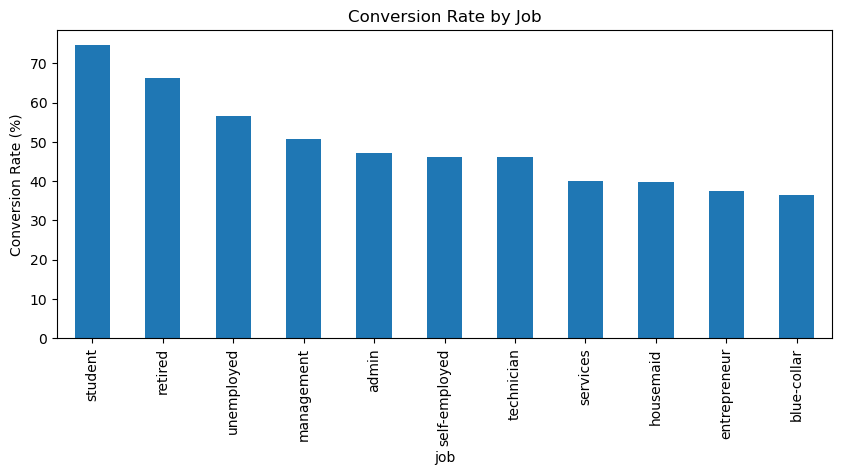

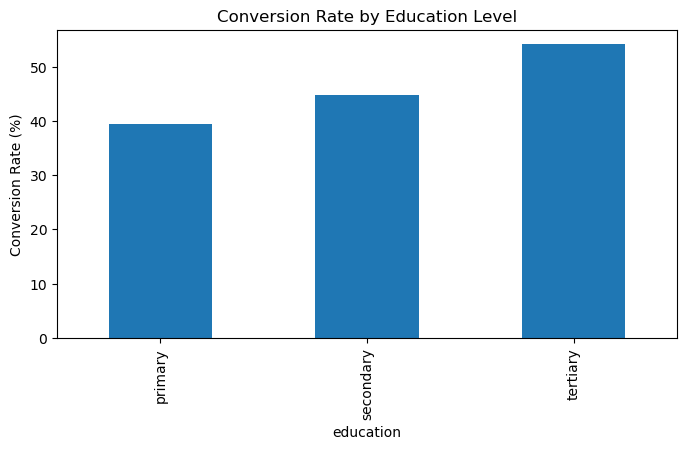

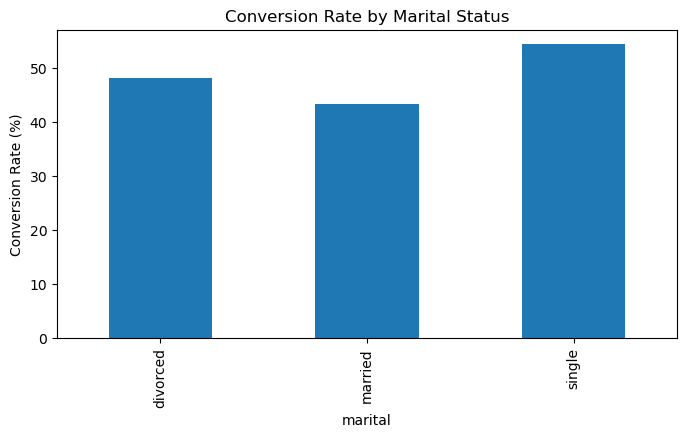

In [37]:

conv_by_job.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Conversion Rate by Job")
plt.ylabel("Conversion Rate (%)")
plt.show()

conv_by_edu.plot(kind='bar', figsize=(8,4))
plt.title("Conversion Rate by Education Level")
plt.ylabel("Conversion Rate (%)")
plt.show()

conv_by_marital.plot(kind='bar', figsize=(8,4))
plt.title("Conversion Rate by Marital Status")
plt.ylabel("Conversion Rate (%)")
plt.show()

#Insights & Recommendations

## 1️⃣ Overall Campaign Performance
- **Overall Conversion Rate:** 47.38 %  
  Nearly half of all contacted customers subscribed to a term deposit, showing a moderately successful campaign.

---

## 2️⃣ Customer Segment Insights

### By Job Type
| Job | Conversion Rate (%) |
|------|-----------------------|
| Student | 74.72 |
| Retired | 66.32 |
| Unemployed | 56.58 |
| Management | 50.70 |
| Admin | 47.30 |

**Insight :** Students and retired clients show the highest propensity to open term deposits, possibly due to fewer financial commitments (students) and stable income (retirees). Campaigns targeting these groups could yield higher returns.

---

### By Education Level
| Education | Conversion Rate (%) |
|------------|--------------------|
| Tertiary | 54.11 |
| Secondary | 44.74 |
| Primary | 39.40 |

**Insight :** Higher education correlates with greater engagement in financial products. Marketing messages emphasizing financial planning and investment value may resonate better with this group.

---

### By Marital Status
| Status | Conversion Rate (%) |
|---------|---------------------|
| Single | 54.35 |
| Divorced | 48.11 |
| Married | 43.38 |

**Insight :** Single clients show a higher response rate than married ones, suggesting individual decision makers may be quicker to act on financial offers.

---

### By Loan Status
| Loan Flag | Conversion Rate (%) |
|------------|--------------------|
| 0 (No Loan) | 59.65 |
| 1 (Has Loan) | 36.47 |

**Insight :** Customers without existing loans are significantly more likely to subscribe. The bank could prioritize these prospects for future campaigns.

---

### By Age Group
| Age Group | Conversion Rate (%) |
|------------|--------------------|
| 18 – 30 | 59.83 |
| 31 – 50 | 42.84 |
| 51 + | 51.97 |

**Insight :** Younger (18 – 30) and older (51 +) segments respond better than middle-aged (31 – 50) clients. Tailoring offers to these age bands could improve response rates.

---

### By Recent Contact Flag
| Flag | Conversion Rate (%) |
|-------|--------------------|
| 0 (Not Recently Contacted) | 47.39 |
| 1 (Contacted Recently) | 45.45 |

**Insight :** Recent contact did not substantially change conversion rates, implying follow-up timing alone does not drive success.

---

## 3️⃣ Numeric Drivers (Correlation View)
| Variable | Correlation (r) | Interpretation |
|------------|----------------|----------------|
| duration | +0.45 | Longer calls are strongly associated with “yes” responses – indicates engagement. |
| previous | +0.14 | Prior contact history slightly increases success. |
| balance | +0.08 | Customers with higher balances tend to subscribe more. |
| campaign | –0.13 | More contacts reduce success – possible fatigue effect. |
| any_loan_flag | –0.23 | Having a loan reduces likelihood of subscription. |

---

## 4️⃣ Key Recommendations
1. **Target high-performing segments** – students and retirees show conversion rates above 60 %.  
2. **Focus on educated and younger audiences** – tertiary-educated and 18 – 30 year olds are more responsive.  
3. **Prioritize customers without existing loans** for deposit offers.  
4. **Optimize call strategy** – invest in longer quality calls rather than increasing contact frequency.  
5. **Personalize messages** – highlight financial growth for students and retirement security for older clients.

---

## 5️⃣ Conclusion
The analysis shows a clear pattern of who is most likely to convert and why. Targeting high-potential segments (students, retirees, single clients, and no-loan holders) while refining the contact strategy can further improve campaign performance beyond the current 47 % overall rate.
